In [31]:
import statsmodels.tsa.stattools as ts
import fix_yahoo_finance as yf

# download J.P Morgan 's data from yahoo finance
jpmorgan = yf.download('JPM', start='2018-02-01',end='2018-12-30')

[*********************100%***********************]  1 of 1 completed


In [32]:
jpmorgan.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-21,96.68,98.43,93.69,94.17,88.94,41313900
2018-12-24,92.89,94.22,92.14,92.14,87.02,17009300
2018-12-26,92.69,95.96,91.11,95.96,90.63,22542900
2018-12-27,94.82,97.15,93.55,97.04,91.65,20304700
2018-12-28,97.95,98.32,96.44,96.83,91.45,17963300


In [33]:
# Calculate daily stock return
jpmorgan['Daily Return'] = jpmorgan['Adj Close'].pct_change()

In [34]:
jpmorgan.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2018-01-31,115.65,116.66,115.16,115.67,107.35,13141400,nan
2018-02-01,115.77,116.99,115.48,116.87,108.46,13800600,0.01
2018-02-02,116.49,116.92,114.09,114.28,106.06,16477300,-0.02
2018-02-05,113.00,114.59,103.98,108.80,100.98,30097600,-0.05
2018-02-06,106.85,112.48,106.61,112.11,104.05,33114800,0.03


In [35]:
# Average stock value
jpmorgan['MA5'] = jpmorgan['Adj Close'].rolling(window=5).mean()
jpmorgan['MA10'] = jpmorgan['Adj Close'].rolling(window=10).mean()
jpmorgan['MA20'] = jpmorgan['Adj Close'].rolling(window=20).mean()

In [36]:
jpmorgan.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA5,MA10,MA20
Date,,,,,,,,,,
2018-01-31,115.65,116.66,115.16,115.67,107.35,13141400,nan,nan,nan,nan
2018-02-01,115.77,116.99,115.48,116.87,108.46,13800600,0.01,nan,nan,nan
2018-02-02,116.49,116.92,114.09,114.28,106.06,16477300,-0.02,nan,nan,nan
2018-02-05,113.00,114.59,103.98,108.80,100.98,30097600,-0.05,nan,nan,nan
2018-02-06,106.85,112.48,106.61,112.11,104.05,33114800,0.03,105.38,nan,nan


In [37]:
# Stock volatility
jpmorgan['STD5'] = jpmorgan['Adj Close'].rolling(window=5).std()
jpmorgan['STD10'] = jpmorgan['Adj Close'].rolling(window=10).std()
jpmorgan['STD20'] = jpmorgan['Adj Close'].rolling(window=20).std()

In [38]:
jpmorgan

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA5,MA10,MA20,STD5,STD10,STD20
Date,,,,,,,,,,,,,
2018-01-31,115.65,116.66,115.16,115.67,107.35,13141400,nan,nan,nan,nan,nan,nan,nan
2018-02-01,115.77,116.99,115.48,116.87,108.46,13800600,0.01,nan,nan,nan,nan,nan,nan
2018-02-02,116.49,116.92,114.09,114.28,106.06,16477300,-0.02,nan,nan,nan,nan,nan,nan
2018-02-05,113.00,114.59,103.98,108.80,100.98,30097600,-0.05,nan,nan,nan,nan,nan,nan
2018-02-06,106.85,112.48,106.61,112.11,104.05,33114800,0.03,105.38,nan,nan,2.96,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,96.68,98.43,93.69,94.17,88.94,41313900,-0.02,91.70,93.46,98.00,1.81,2.24,5.25
2018-12-24,92.89,94.22,92.14,92.14,87.02,17009300,-0.02,90.40,92.59,97.32,2.42,2.87,5.75
2018-12-26,92.69,95.96,91.11,95.96,90.63,22542900,0.04,89.91,92.17,96.69,1.94,2.81,5.76


<AxesSubplot:xlabel='Date'>

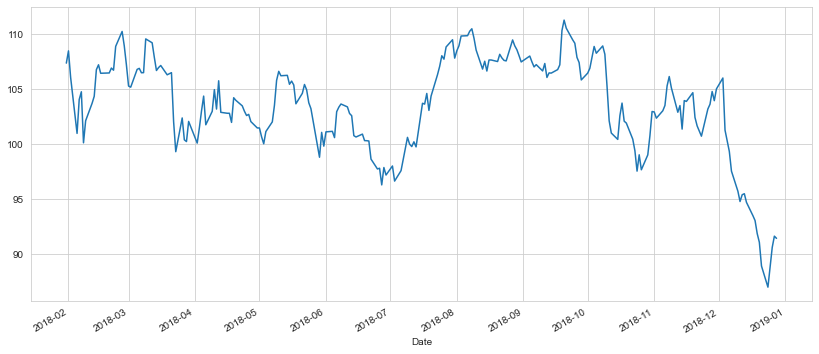

In [49]:
# Show JP Morgan stock price evolution using a plot
jpmorgan['Adj Close'].plot(figsize=(14, 6))


In [61]:
# save the date to csv file named jpmorgan.csv
jpmorgan.to_csv("jpmorgan.csv")

In [ ]:
# Add a trendline to the graph (trendline options – linear)


# 1. Linear Regression

Implement a two-variable regression using the following data:
* Explained variable: JP Morgan stock (adjusted close price)
* Explanatory variable: S&P500
* Period: February 1, 2018 – December 30, 2018
* Frequency: Daily

In [62]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

SP500 = yf.download('^GSPC', start='2018-02-01',end='2018-12-30')
SP500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-31,"2,832.41","2,839.26","2,813.04","2,823.81","2,823.81",4261280000
2018-02-01,"2,816.45","2,835.96","2,812.70","2,821.98","2,821.98",3938450000
2018-02-02,"2,808.92","2,808.92","2,759.97","2,762.13","2,762.13",4301130000
2018-02-05,"2,741.06","2,763.39","2,638.17","2,648.94","2,648.94",5283460000
2018-02-06,"2,614.78","2,701.04","2,593.07","2,695.14","2,695.14",5891660000
...,...,...,...,...,...,...
2018-12-21,"2,465.38","2,504.41","2,408.55","2,416.62","2,416.62",7609010000
2018-12-24,"2,400.56","2,410.34","2,351.10","2,351.10","2,351.10",2613930000
2018-12-26,"2,363.12","2,467.76","2,346.58","2,467.70","2,467.70",4233990000


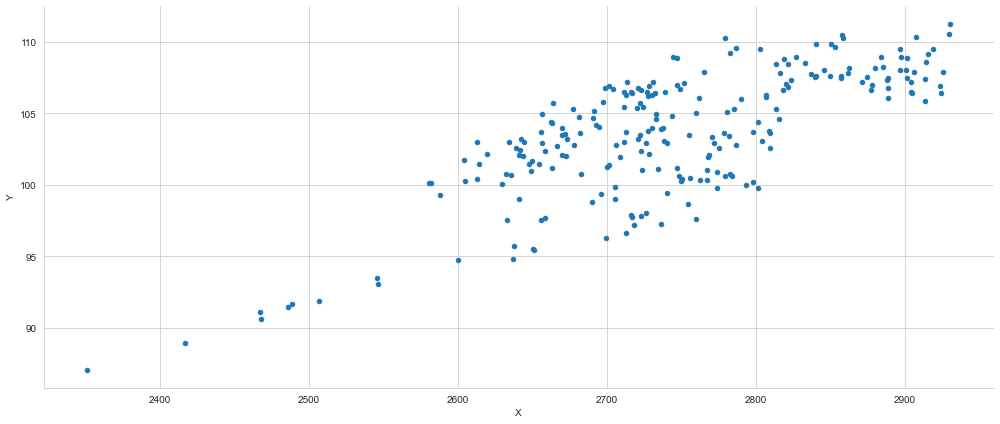

In [64]:
y = jpmorgan['Adj Close']
X = SP500['Adj Close']

# draw scatter plot of X and y
data = pd.DataFrame({'X':X, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

In [65]:
# Regression
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     314.7
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           8.05e-45
Time:                        09:27:43   Log-Likelihood:                -567.40
No. Observations:                 230   AIC:                             1139.
Df Residuals:                     228   BIC:                             1146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1868      5.100      2.586      0.010       3.138      23.236
X

In [66]:
# Verify calculation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   13.19
X        0.03
dtype: float64

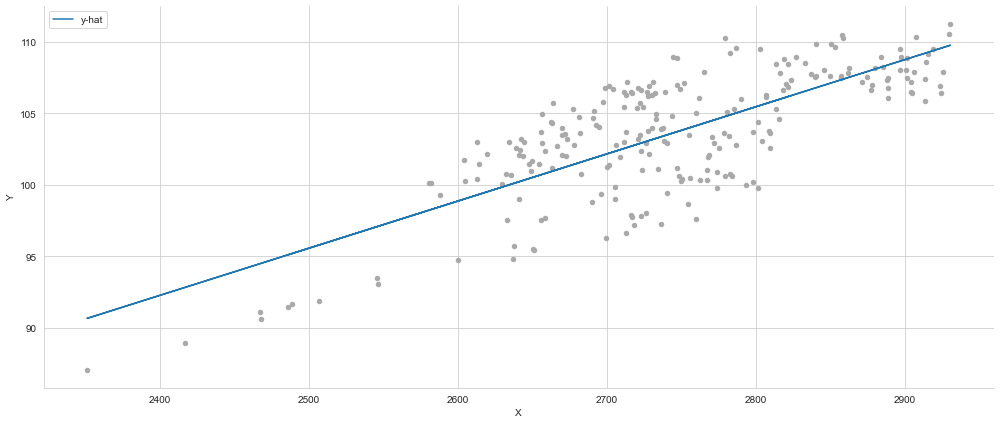

In [69]:
# Display model & residuals
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
# for _, row in data.iterrows():
#    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

# 2. Univariate Time Series

Download the following data: o Data source: https://fred.stlouisfed.org/series/CSUSHPISA
* Period considered in the analysis: January 1987 – latest data
* Frequency: monthly data

With this data, do the following using Python languages:
* Forecast S&P/Case-Shiller U.S. National Home Price Index using an ARMA model.
* Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root in 
Case-Shiller Index series.
* Implement an ARIMA(p,d,q) model. Determine p, d, q using Information Criterion or BoxJenkins methodology. Comment the results.
* Forecast the future evolution of Case-Shiller Index using the ARMA model. Test model 
using in-sample forecasts.

Firslty, lownload data from the folling link:
https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=968&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CSUSHPISA&scale=left&cosd=1987-01-01&coed=2020-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-09-19&revision_date=2020-09-19&nd=1987-01-01

In [75]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import pandas as pd
import numpy as np
from numpy.linalg import LinAlgError

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [76]:
data = pd.read_csv("CSUSHPISA.csv")
data["log"] = np.log(data["CSUSHPISA"])
data["diff"] = data["CSUSHPISA"].diff()
data["log_diff"] = np.log(data["CSUSHPISA"]).diff()

In [77]:
data

,DATE,CSUSHPISA,log,diff,log_diff
0,1987-01-01,63.99,4.16,nan,nan
1,1987-02-01,64.45,4.17,0.46,0.01
2,1987-03-01,64.76,4.17,0.31,0.00
3,1987-04-01,65.15,4.18,0.39,0.01
4,1987-05-01,65.58,4.18,0.43,0.01
...,...,...,...,...,...
397,2020-02-01,215.70,5.37,1.01,0.00
398,2020-03-01,216.73,5.38,1.03,0.00
399,2020-04-01,217.60,5.38,0.87,0.00
400,2020-05-01,217.69,5.38,0.09,0.00


<AxesSubplot:>

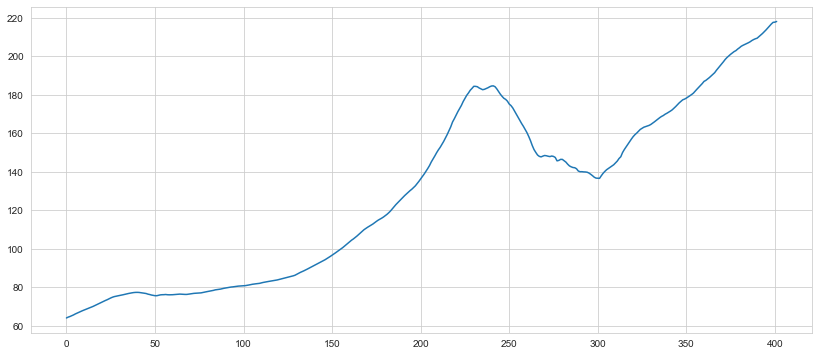

In [80]:
# plot the data
data["CSUSHPISA"].plot(figsize=(14, 6))

<AxesSubplot:>

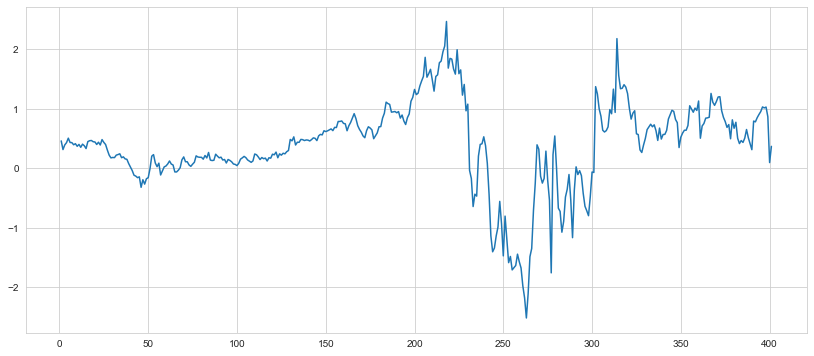

In [83]:
data["diff"].plot(figsize=(14, 6))

<AxesSubplot:>

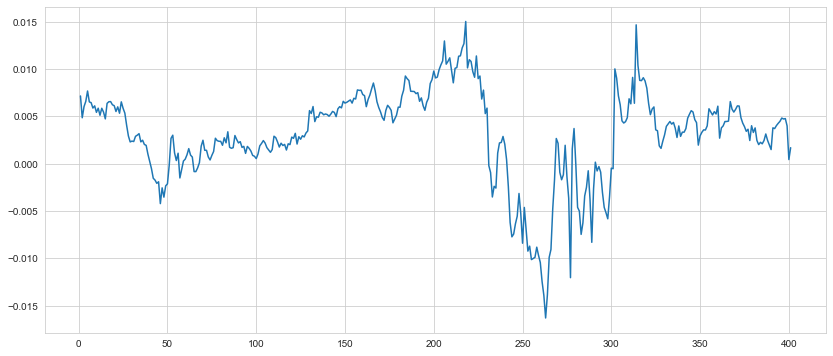

In [26]:
data["log_diff"].plot(figsize=(14, 6))

### 2.1 # Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root in Case-Shiller Index series.

In [27]:
result = tsa.adfuller(data["CSUSHPISA"])
result

(-0.43881777681927475,
 0.9034130797196382,
 14,
 387,
 {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636},
 11.41418449064679)

#### analyze the result

Explain the results:
(-0.43881777681927475,       test-statistic
0.9034130797196382,          p-value
0, 
387,                        data points in the sample
 {'1%': -3.447360865754795,   critical values
  '5%': -2.862339633287972,
  '10%': -2.56719565730786}, 
   11.41418449064679)

Since the calculated value of the test statistic (-0.43881777681927475) is 
larger than any of the critical values at the 1, 5, or 10 percent levels, we cannot reject the null hypothesis of 𝛾 = 0 and thus we are unlikely to have found a mean reverting time series.

In [84]:
result = tsa.adfuller(data["diff"].dropna())
result
# not stationary under all the criticals

(-2.8681753215515737,
 0.049175910223161964,
 13,
 387,
 {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636},
 10.644276213098237)

In [85]:
result = tsa.adfuller(data["log_diff"].dropna())
result
# The log diff series are stationary under the critical values of 10% 

(-2.752557158880614,
 0.06537670023795651,
 13,
 387,
 {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636},
 -3823.472317834945)

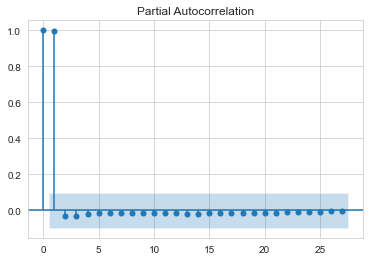

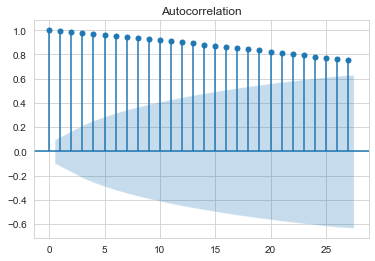

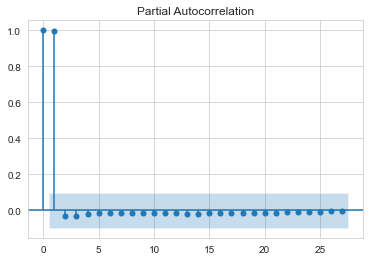

In [92]:
# draw ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(data["CSUSHPISA"])
plot_pacf(data["CSUSHPISA"])  
# ACF and PACF show AR(2)

### 2.2 Implement an ARIMA(p,d,q) model. Determine p, d, q using Information Criterion or BoxJenkins methodology. Comment the results.

In [94]:
train_size = int(len(data)*.8)
results = {}
y_true = data["CSUSHPISA"].iloc[train_size:]
for p in range(5):
    for q in range(5):
        aic, bic = [], []
        if p == 0 and q == 0:
            continue
        print(p, q)
        convergence_error = stationarity_error = 0
        y_pred = []

        for T in range(train_size, len(data["CSUSHPISA"])):
            train_set = data["CSUSHPISA"].iloc[T - train_size: T].dropna()
            try:
                model = tsa.ARMA(endog=train_set, order=(p, q)).fit()
            except LinAlgError:
                convergence_error += 1
            except ValueError:
                stationarity_error += 1

            forecast, _, _ = model.forecast(steps=1)
            y_pred.append(forecast[0])
            aic.append(model.aic)
            bic.append(model.bic)

        result = (pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
                  .replace(np.inf, np.nan)
                  .dropna())

        rmse = np.sqrt(mean_squared_error(
            y_true=result.y_true, y_pred=result.y_pred))

        results[(p, q)] = [rmse,
                           np.mean(aic),
                           np.mean(bic),
                           convergence_error,
                           stationarity_error]

0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


In [95]:
# save the rusult
arma_results = pd.DataFrame(results).T
arma_results.columns = ['RMSE', 'AIC', 'BIC', 'convergence', 'stationarity']
arma_results.index.names = ['p', 'q']
print (arma_results.info())

arma_results.to_csv("arima.csv")

# with pd.HDFStore('arima.h5') as store:
#    store.put('arma', arma_results)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, (0, 1) to (4, 4)
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RMSE          24 non-null     float64
 1   AIC           24 non-null     float64
 2   BIC           24 non-null     float64
 3   convergence   24 non-null     float64
 4   stationarity  24 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB
None


In [96]:
# We aim to minimize both RMSE and BIC
arma_results.nsmallest(5, columns=['RMSE'])
arma_results.nsmallest(5, columns=['BIC'])

RMSE    AIC    BIC  convergence  stationarity
p q                                               
2 0  0.19  99.08 114.16         0.00          0.00
  1  0.19  99.58 118.44         0.00          0.00
3 0  0.19 100.05 118.91         0.00          0.00
  1  0.92  98.99 121.62        28.00          0.00
2 2  0.19 101.78 124.41         0.00          0.00

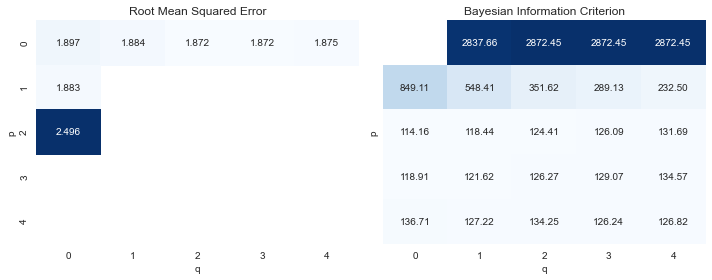

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharex=True, sharey=True)
sns.heatmap(arma_results[arma_results.RMSE<.5].RMSE.unstack().mul(10), fmt='.3f', annot=True, cmap='Blues', ax=axes[0], cbar=False);
sns.heatmap(arma_results.BIC.unstack(), fmt='.2f', annot=True, cmap='Blues', ax=axes[1], cbar=False)
axes[0].set_title('Root Mean Squared Error')
axes[1].set_title('Bayesian Information Criterion')
fig.tight_layout()

In [100]:
arma_results.rank().loc[:, ['RMSE', 'BIC']].mean(1).nsmallest(5)

p  q
2  0   3.50
   1   3.50
   2   3.50
   3   3.50
3  0   3.50
dtype: float64

In [104]:
# Estimating the best ARMA Model
best_p, best_q = arma_results.rank().loc[:, ['RMSE', 'BIC']].mean(1).idxmin()
print(best_p,best_q)
best_arma_model = tsa.ARMA(endog=data["CSUSHPISA"], order=(best_p, best_q)).fit()
print(best_arma_model.summary())
# AR(2)

2 0
                              ARMA Model Results                              
Dep. Variable:              CSUSHPISA   No. Observations:                  402
Model:                     ARMA(2, 0)   Log Likelihood                 -27.476
Method:                       css-mle   S.D. of innovations              0.254
Date:                Sun, 20 Sep 2020   AIC                             62.952
Time:                        13:32:39   BIC                             78.938
Sample:                             0   HQIC                            69.281
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             315.1178        nan        nan        nan         nan         nan
ar.L1.CSUSHPISA     1.9670      0.000   6157.782      0.000       1.966       1.968
ar.L2.CSUSHPISA    -0.9671  

<AxesSubplot:>

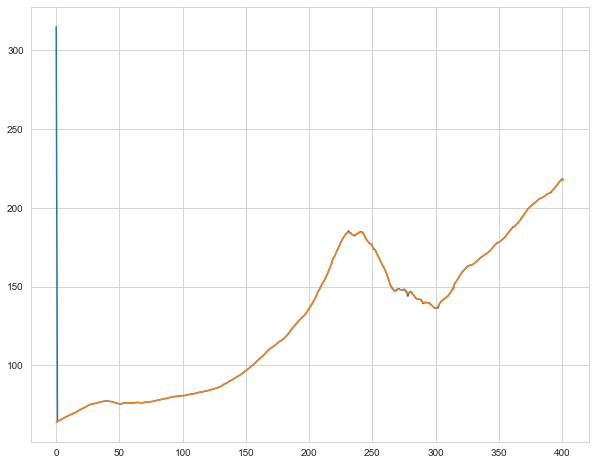

In [109]:
# predict y(t) = 315.1178 + 1.9670 * y(t-1) -0.9671 * y(t-2) 

best_arma_model.predict().plot(figsize=(10,8))
data["CSUSHPISA"].plot()